<a href="https://colab.research.google.com/github/yeshitt/Quora_Double_Checker/blob/main/quora_double_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv(r"questions.csv", error_bad_lines=False)


In [15]:
df.shape

(356338, 6)

In [16]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2.0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,1,3,4.0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,2,5,6.0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,3,7,8.0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,4,9,10.0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0


In [17]:
new_df = df.sample(30000,random_state=2)

In [18]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [19]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
165818,165818,327749,327750.0,How good is the master of science in informati...,I got 6.0 CGPA will I get first class?,0.0
218572,218572,430933,430934.0,What is epicenter and hypocenter and how do th...,Why does an epicenter change?,0.0
155386,155386,307306,307307.0,How do I stop eating cake?,How can I stop eating too much?,0.0
277547,277547,545694,545695.0,What is the most prevalent language in India?,What is the prevalent language in India today?,0.0
143460,143460,283919,283920.0,What are some ideas of small scale businesses?,What are some small scale business ideas?,1.0


In [20]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [21]:
new_df.duplicated().sum()

0

0.0    18872
1.0    11128
Name: is_duplicate, dtype: int64
0.0    62.906667
1.0    37.093333
Name: is_duplicate, dtype: float64


<Axes: >

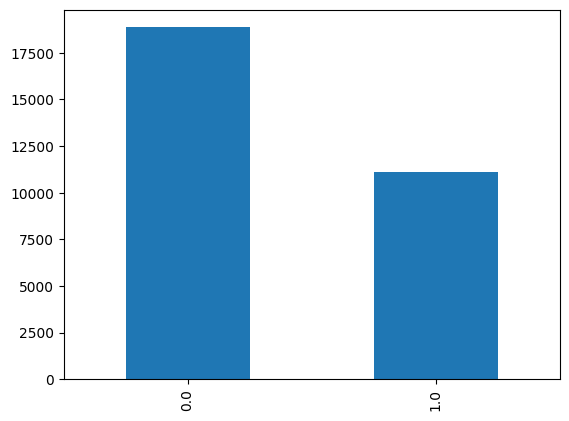

In [22]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [23]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 59855
Number of questions getting repeated 134


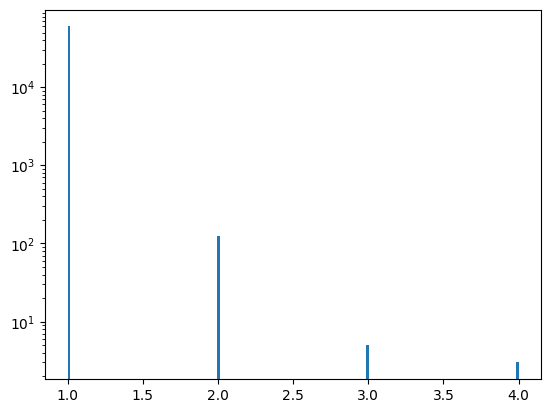

In [24]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [25]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [26]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
165818,165818,327749,327750.0,How good is the master of science in informati...,I got 6.0 CGPA will I get first class?,0.0,85,38
218572,218572,430933,430934.0,What is epicenter and hypocenter and how do th...,Why does an epicenter change?,0.0,56,29
155386,155386,307306,307307.0,How do I stop eating cake?,How can I stop eating too much?,0.0,26,31
277547,277547,545694,545695.0,What is the most prevalent language in India?,What is the prevalent language in India today?,0.0,45,46
143460,143460,283919,283920.0,What are some ideas of small scale businesses?,What are some small scale business ideas?,1.0,46,41


In [27]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(str(row).split(" ")) if not pd.isna(row) else 0)
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(str(row).split(" ")) if not pd.isna(row) else 0)
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
165818,165818,327749,327750.0,How good is the master of science in informati...,I got 6.0 CGPA will I get first class?,0.0,85,38,14,9
218572,218572,430933,430934.0,What is epicenter and hypocenter and how do th...,Why does an epicenter change?,0.0,56,29,10,5
155386,155386,307306,307307.0,How do I stop eating cake?,How can I stop eating too much?,0.0,26,31,6,7
277547,277547,545694,545695.0,What is the most prevalent language in India?,What is the prevalent language in India today?,0.0,45,46,8,8
143460,143460,283919,283920.0,What are some ideas of small scale businesses?,What are some small scale business ideas?,1.0,46,41,8,7


In [28]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [29]:
def common_words(row):
    if pd.isna(row['question1']) or pd.isna(row['question2']):
        return 0

    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)


In [31]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
165818,165818,327749,327750.0,How good is the master of science in informati...,I got 6.0 CGPA will I get first class?,0.0,85,38,14,9,0
218572,218572,430933,430934.0,What is epicenter and hypocenter and how do th...,Why does an epicenter change?,0.0,56,29,10,5,1
155386,155386,307306,307307.0,How do I stop eating cake?,How can I stop eating too much?,0.0,26,31,6,7,4
277547,277547,545694,545695.0,What is the most prevalent language in India?,What is the prevalent language in India today?,0.0,45,46,8,8,6
143460,143460,283919,283920.0,What are some ideas of small scale businesses?,What are some small scale business ideas?,1.0,46,41,8,7,5


In [32]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [33]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
165818,165818,327749,327750.0,How good is the master of science in informati...,I got 6.0 CGPA will I get first class?,0.0,85,38,14,9,0,21
218572,218572,430933,430934.0,What is epicenter and hypocenter and how do th...,Why does an epicenter change?,0.0,56,29,10,5,1,14
155386,155386,307306,307307.0,How do I stop eating cake?,How can I stop eating too much?,0.0,26,31,6,7,4,13
277547,277547,545694,545695.0,What is the most prevalent language in India?,What is the prevalent language in India today?,0.0,45,46,8,8,6,16
143460,143460,283919,283920.0,What are some ideas of small scale businesses?,What are some small scale business ideas?,1.0,46,41,8,7,5,15


In [34]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
165818,165818,327749,327750.0,How good is the master of science in informati...,I got 6.0 CGPA will I get first class?,0.0,85,38,14,9,0,21,0.00
218572,218572,430933,430934.0,What is epicenter and hypocenter and how do th...,Why does an epicenter change?,0.0,56,29,10,5,1,14,0.07
155386,155386,307306,307307.0,How do I stop eating cake?,How can I stop eating too much?,0.0,26,31,6,7,4,13,0.31
277547,277547,545694,545695.0,What is the most prevalent language in India?,What is the prevalent language in India today?,0.0,45,46,8,8,6,16,0.38
143460,143460,283919,283920.0,What are some ideas of small scale businesses?,What are some small scale business ideas?,1.0,46,41,8,7,5,15,0.33


minimum characters 2
maximum characters 339
average num of characters 59


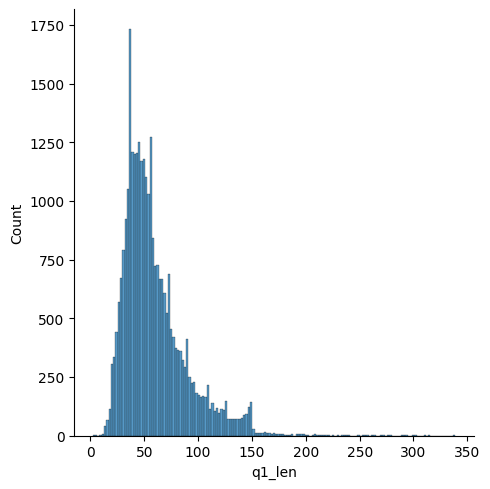

In [35]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 9
maximum characters 1151
average num of characters 60


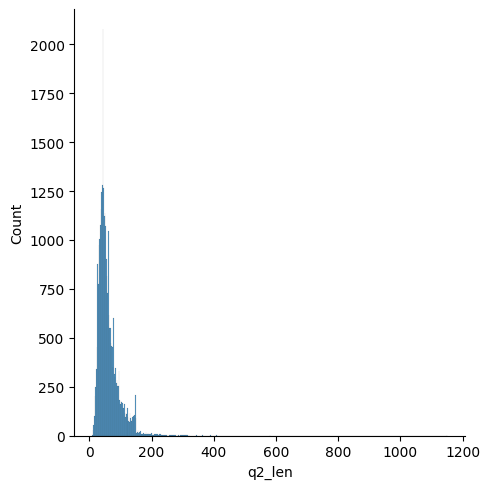

In [36]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 66
average num of words 10


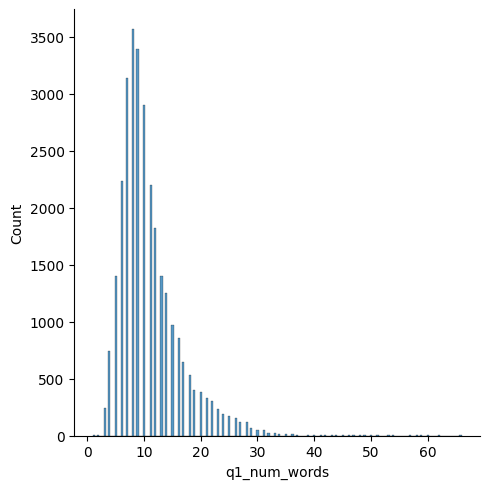

In [37]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


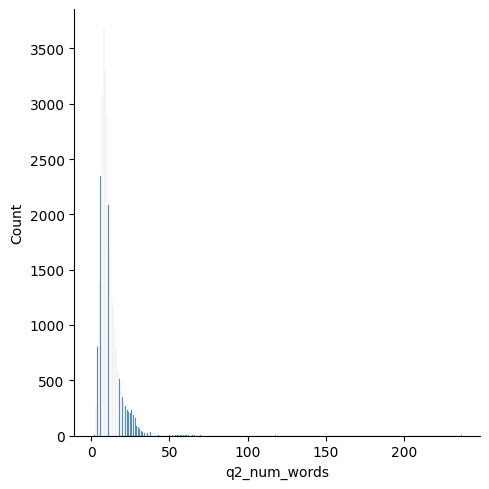

In [38]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

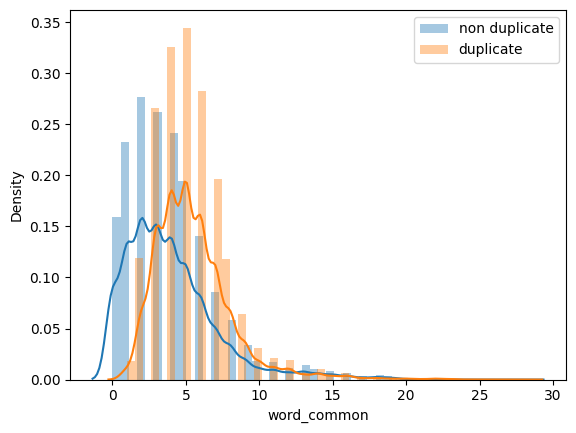

In [39]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

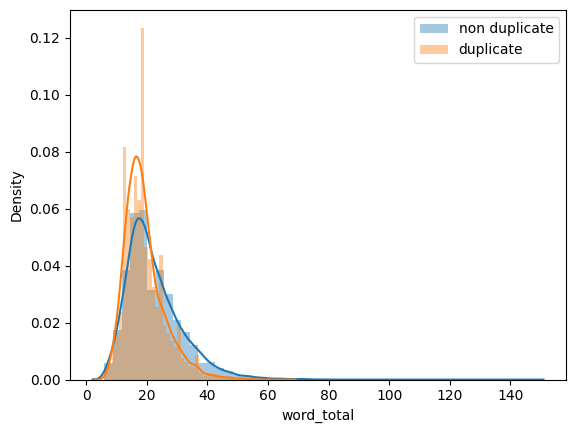

In [40]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

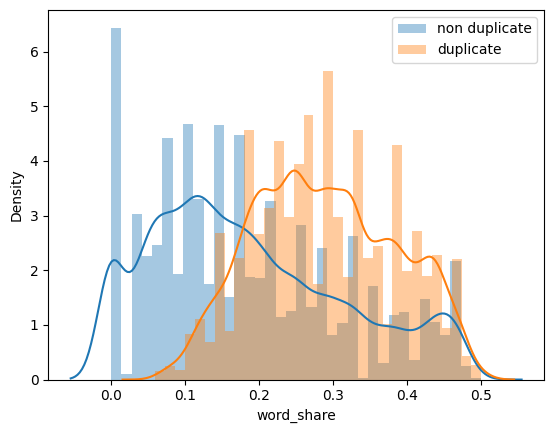

In [41]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [42]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
165818,How good is the master of science in informati...,I got 6.0 CGPA will I get first class?
218572,What is epicenter and hypocenter and how do th...,Why does an epicenter change?
155386,How do I stop eating cake?,How can I stop eating too much?
277547,What is the most prevalent language in India?,What is the prevalent language in India today?
143460,What are some ideas of small scale businesses?,What are some small scale business ideas?


In [43]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
165818,0.0,85,38,14,9,0,21,0.00
218572,0.0,56,29,10,5,1,14,0.07
155386,0.0,26,31,6,7,4,13,0.31
277547,0.0,45,46,8,8,6,16,0.38
143460,1.0,46,41,8,7,5,15,0.33


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [45]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [46]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
165818,0.0,85,38,14,9,0,21,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
218572,0.0,56,29,10,5,1,14,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
155386,0.0,26,31,6,7,4,13,0.31,0,0,...,0,0,0,0,0,0,0,0,0,0
277547,0.0,45,46,8,8,6,16,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0
143460,1.0,46,41,8,7,5,15,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7728333333333334

In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.773